<p><img src="imagenes/rn3.png" width="140" align="left"><img src="http://www.identidadbuho.uson.mx/assets/letragrama-rgb-150.jpg" width="400" align="right"></p>

# [Curso de Redes Neuronales](https://curso-redes-neuronales-unison.github.io/Temario/)

# Una sola neurona logística

[**Julio Waissman Vilanova**](http://mat.uson.mx/~juliowaissman/), 21 de febrero de 2018.

En esta libreta vamos a revisar los aspectos básicos del aprendizaje para una sola neurona de salida logística, sin capas ocultas y usando el criterio de pérdida de entropia en dos clases. El algoritmo es sencillo pero es importante entenderlo bien antes de pasar a cosas más complicadas.

Empecemos por inicializar los modulos que vamos a requerir.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image  # Esto es para desplegar imágenes en la libreta

plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('ggplot')

## 1. Función logística, función de pérdida y gradiente de la función de costo

La función logística está dada por 

$$
g(z) = \frac{1}{1 + e^{-z}},
$$

la cual es importante que podamos calcular en forma vectorial. Si bien el calculo es de una sola linea, el uso de estas funciones auxiliares facilitan la legibilidad del código.

#### Desarrolla la función logística, la cual se calcule para todos los elementos de un ndarray.

In [2]:
def logistica(z):
    """
    Calcula la función logística para cada elemento de z
    
    @param z: un ndarray
    @return: un ndarray de las mismas dimensiones que z
    """
    # Introduce código aqui (una linea de código)
    #---------------------------------------------------
    return 1/(1 + np.exp(-z))
    #---------------------------------------------------
    
# prueba que efectivamente funciona la función implementada
# si el assert es falso regresa un error de aserción (el testunit de los pobres)
assert (np.abs(logistica(np.array([-1, 0, 1])) - np.array([ 0.26894142, 0.5, 0.73105858]))).sum() < 1e-6


Para probar la función vamos a graficar la función logística en el intervalo [-5, 5]

Text(0,0.5,'$\\frac{1}{1 + \\exp(-z)}$')

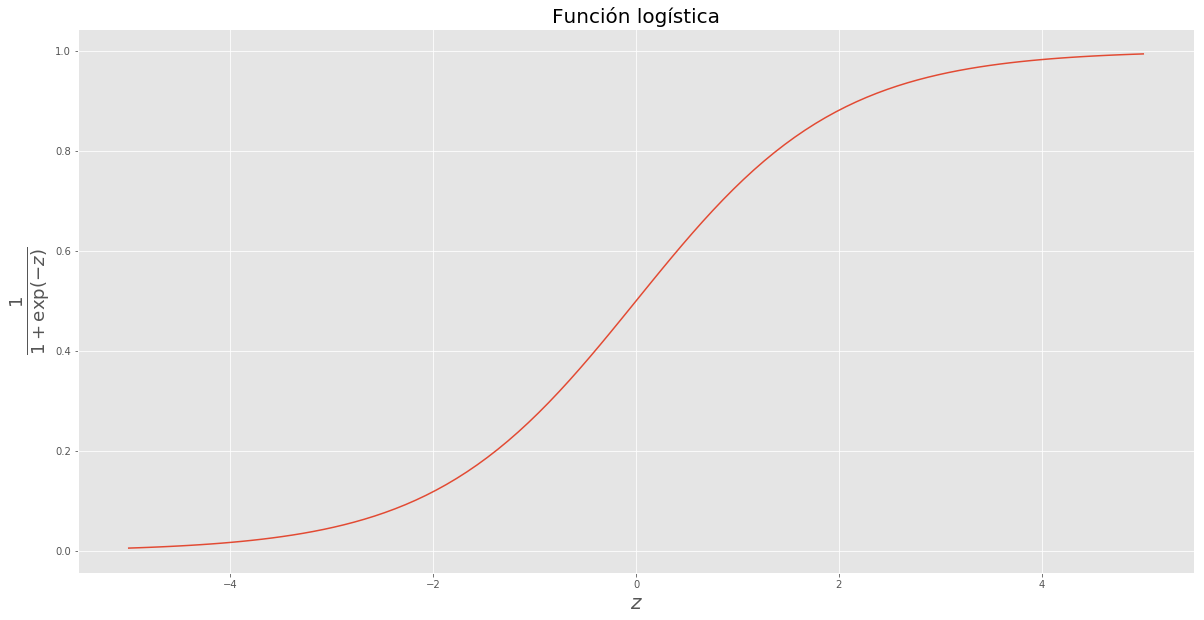

In [3]:
z = np.linspace(-5, 5, 100)

plt.plot( z, logistica(z))
plt.title(u'Función logística', fontsize=20)
plt.xlabel(r'$z$', fontsize=20)
plt.ylabel(r'$\frac{1}{1 + \exp(-z)}$', fontsize=26)


Una vez establecida la función logística, vamos a implementar la función de pérdida *sin regularizar* que se utiliza típicamente en clasificación binaria, la cual está dada por

$$
Loss(w, b) = -\frac{1}{M} \sum_{i=1}^M \left[ y^{(i)}\log(a^{(i)}) + (1 - y^{(i)})\log(1 - a^{(i)})\right],
$$

donde 

$$
a^{(i)} = g(z^{(i)}), \quad\quad z^{(i)} = w^T x^{(i)} + b
$$

las cuales fueron ecuaciones revisadas en clase.

#### Implementa la función de pérdida para un conjunto de aprendizaje.

In [32]:
def Loss(x, y, w, b):
    """
    Calcula el costo de una w dada para el conjunto dee entrenamiento dado por y y x
    
    @param x: un ndarray de dimensión (M, n) con la matriz de diseño
    @param y: un ndarray de dimensión (M, ) donde cada entrada es 1.0 o 0.0
    @param w: un ndarray de dimensión (n, ) con los pesos
    @param b: un flotante con el sesgo

    @return: un flotante con el valor de pérdida
    
    """ 
    M = x.shape[0]
    
    #------------------------------------------------------------------------
    # Agregua aqui tu código

    a = logistica(x @ w + b)
    
    return -(1/M) * (np.log(a[y > 0.5]).sum() + np.log(1 - a[y < 0.5]).sum())  
    
    #------------------------------------------------------------------------

    
# Otra vez el testunit del pobre (ya lo calcule yo, pero puedes hacerlo a mano para estar seguro)
w = np.array([1])
b = 1.0

x = np.array([[10],
              [-5]])

y1 = np.array([1, 0])
y2 = np.array([0, 1])
y3 = np.array([0, 0])
y4 = np.array([1, 1])

assert abs(Loss(x, y1, w, b) - 0.01) < 1e-2
assert abs(Loss(x, y2, w, b) - 7.5) < 1e-2
assert abs(Loss(x, y3, w, b) - 5.5) < 1e-2
assert abs(Loss(x, y4, w, b) - 2.0) < 1e-2

De la misma manera, para poder implementar las funciones de aprendizaje, vamos a implementar el gradiente de la función de pérdida. El gradiente de la función de pérdida respecto a $\omega$ es (como lo vimos en clase) el siguiente:

$$
\frac{\partial Loss(w, b)}{\partial w_j} = -\frac{1}{M} \sum_{i=1}^M \left(y^{(i)} - a^{(i)}\right)x_j^{(i)} 
$$

$$
\frac{\partial Loss(w, b)}{\partial b} = -\frac{1}{M} \sum_{i=1}^M \left(y^{(i)} - a^{(i)}\right) 
$$

y a partir de las ecuaciones individuales de puede obtener $\nabla Loss(\omega)$, la cual no la vamos a escribir en la libreta para que revisen en sus notas como se puede resolver este problema en forma matricial. 

#### IImplementa (con operaciones matriciales) el calculo del gradiente de la función de pérdida.

In [41]:
def gradiente(x, y, w, b):
    """
    Calcula el gradiente de la función de pérdida para clasificación binaria, 
    utilizando una neurona logística, para w y b y conociendo un conjunto de aprendizaje.
    
    @param x: un ndarray de dimensión (M, n) con la matriz de diseño
    @param y: un ndarray de dimensión (M, ) donde cada entrada es 1.0 o 0.0
    @param w: un ndarray de dimensión (n, ) con los pesos
    @param b: un flotante con el sesgo
    
    @return: dw, db, un ndarray de mismas dimensiones que w y un flotnte con el cálculo de 
             la dervada evluada en el punto w y b
                 
    """
    M = x.shape[0]

    #------------------------------------------------------------------------
    # Agregua aqui tu código

    a = logistica(x @ w + b).squeeze()
    dw = -(1 / M) * x.T @ (y - a)
    db = -(1 / M) * (y - a).sum()    
    #------------------------------------------------------------------------
    
    return dw, db


    
# Otra vez el testunit del pobre (ya lo calcule yo, pero puedes hacerlo a mano para estar seguro)
w = np.array([1])
b = 1.0

x = np.array([[10],
              [-5]])

y1 = np.array([1, 0])
y2 = np.array([0, 1])
y3 = np.array([0, 0])
y4 = np.array([1, 1])

assert abs(0.00898475 - gradiente(x, y1, w, b)[1]) < 1e-4
assert abs(7.45495097 - gradiente(x, y2, w, b)[0]) < 1e-4 
assert abs(4.95495097 - gradiente(x, y3, w, b)[0]) < 1e-4 
assert abs(-0.49101525 - gradiente(x, y4, w, b)[1]) < 1e-4     

## 2. Descenso de gradiente y el método BGFS para regresión logística

Ahora vamos a desarrollar las funciones necesarias para realizar el entrenamiento y encontrar la mejor $\omega$ de acuero a la función de costos y un conjunto de datos de aprendizaje.

Para este problema, vamos a utilizar una base de datos sintética proveniente del curso de [Andrew Ng](www.andrewng.org/) que se encuentra en [Coursera](https://www.coursera.org). Supongamos que pertenecemos al departamente de servicios escolares de la UNISON y vamos a modificar el procedimiento de admisión. En lugar de utilizar un solo exámen (EXCOBA) y la información del cardex de la preparatoria, hemos decidido aplicar dos exámenes, uno sicométrico y otro de habilidades estudiantiles. Dichos exámenes se han aplicado el último año aunque no fueron utilizados como criterio. Así, tenemos un historial entre estudiantes aceptados y resultados de los dos exámenes. El objetivo es hacer un método de regresión que nos permita hacer la admisión a la UNISON tomando en cuenta únicamente los dos exámenes y simplificar el proceso. *Recuerda que esto no es verdad, es solo un ejercicio*.

Bien, los datos se encuentran en el archivo `admision.txt` el cual se encuentra en formato `cvs` (osea los valores de las columnas separados por comas. Vamos a leer los datos y graficar la información para entender un poco los datos.

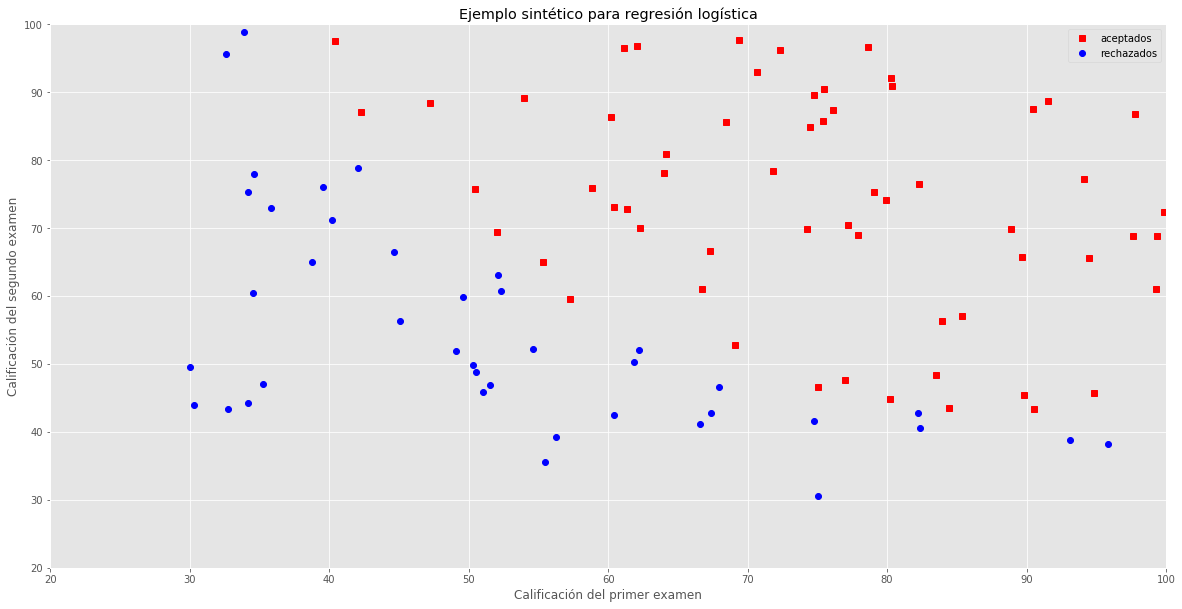

In [42]:
datos = np.loadtxt('datos/admision.txt', comments='%', delimiter=',')

x, y = datos[:,0:-1], datos[:,-1] 

plt.plot(x[y == 1, 0], x[y == 1, 1], 'sr', label='aceptados') 
plt.plot(x[y == 0, 0], x[y == 0, 1], 'ob', label='rechazados')
plt.title(u'Ejemplo sintético para regresión logística')
plt.xlabel(u'Calificación del primer examen')
plt.ylabel(u'Calificación del segundo examen')
plt.axis([20, 100, 20, 100])
plt.legend(loc=0)


Vistos los datos un clasificador lineal podría ser una buena solución. Ahora vamos a implementar el método de descenso de gradiente, casi de la misma manera que lo implementamos para regresión lineal (por lotes)

#### Implementa el descenso de gradiente para el problema de regresión logística en modo batch.

In [43]:
def descenso_rl_lotes(x, y, alpha, tol=1e-4, max_iter=int(1e4), historial=False):
    """
    Descenso de gradiente por lotes para resolver el problema de regresión logística con un conjunto de aprendizaje

    @param x: un ndarray de dimensión (M, n) con la matriz de diseño
    @param y: un ndarray de dimensión (M, ) donde cada entrada es 1.0 o 0.0
    @param alpha: Un flotante (típicamente pequeño) con la tasa de aprendizaje
    @param tol: Un flotante pequeño como criterio de paro. Por default 1e-4
    @param max_iter: Máximo numero de iteraciones. Por default 1e4
    @param historial: Un booleano para saber si guardamos el historial de la función de pérdida o no
    
    @return: w, b, perdida_hist donde w es ndarray de dimensión (n, ) con los pesos; el flotante b  
             con el sesgo y perdida_hist, un ndarray de dimensión (max_iter,) con el valor de la función 
             de pérdida en cada iteración. Si historial == True, entonces perdida_hist = None.
             
    """
    M, n = x.shape
    
    w = np.zeros(n)
    b = 0.0

    if historial:
        perdida_hist = np.zeros(max_iter)
        perdida_hist[0] = Loss(x, y, w, b)
    else:
        perdida_hist = None
            
    
    for iter in range(1, max_iter):
        #--------------------------------------------------------------
        # Agregar aqui tu código
        #
        # Recuerda utilizar las funciones que ya has desarrollado

        dw, db = gradiente(x, y, w, b)
        w -= alpha * dw
        b -= alpha * db
        
        if historial:
            perdida_hist[iter] = Loss(x, y, w, b)

        #--------------------------------------------------------------

    return w, b, perdida_hist


Para probar la función de aprendizaje, vamos a aplicarla a nuestro problema de admisión. Primero recuerda que tienes que hacer una exploración para encontrar el mejor valor de $\epsilon$. Así que utiliza el código de abajo para ajustar $\epsilon$.

Text(0,0.5,'perdida')

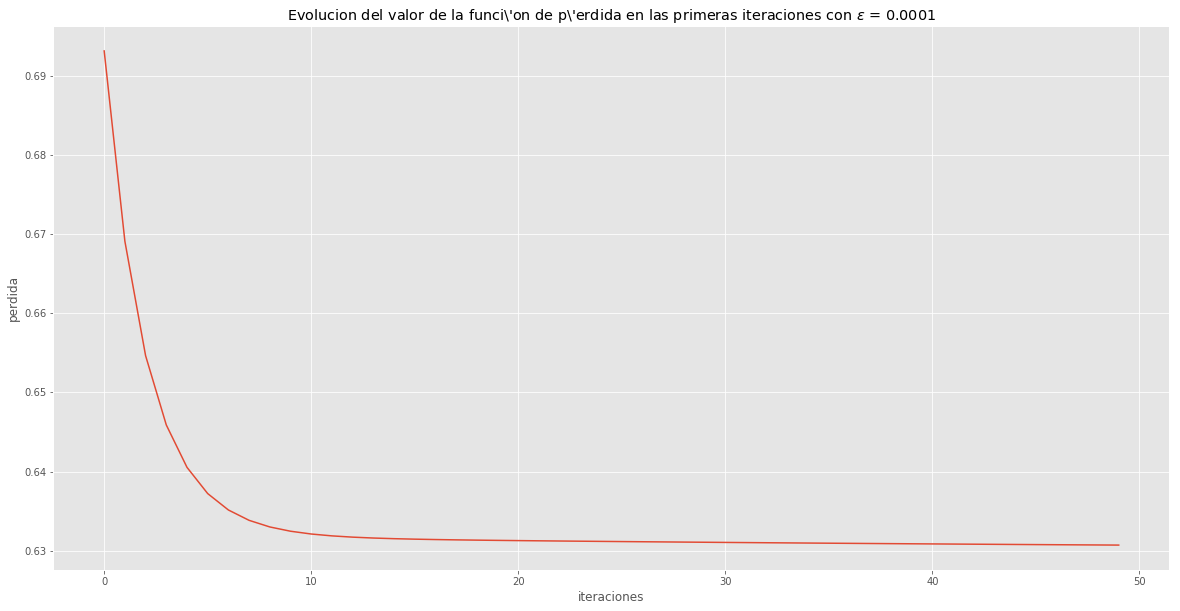

In [44]:
epsilon = 1e-4
mi = 50
_, _, perdida_hist = descenso_rl_lotes(x, y, epsilon, tol=1e-4, max_iter=mi, historial=True)

plt.plot(np.arange(mi), perdida_hist)
plt.title(r'Evolucion del valor de la funci\'on de p\'erdida en las primeras iteraciones con $\epsilon$ = ' + str(epsilon))
plt.xlabel('iteraciones')
plt.ylabel('perdida')


Una vez encontrado el mejor $\epsilon$, entonces podemos calcular $\omega$ (esto va a tardar bastante), recuerda que el costo final debe de ser lo más cercano a 0 posible, así que agrega cuantas iteraciones sean necesarias: 

In [45]:
w, b, _ = descenso_rl_lotes(x, y, epsilon, max_iter = int(1e6))
print("Los pesos obtenidos son: \n{}".format(w))
print("El sesgo obtenidos es: \n{}".format(b))
print("El valor final de la función de pérdida es: {}".format(Loss(x, y, w, b))) 

Los pesos obtenidos son: 
[ 0.04528051  0.03819135]
El sesgo obtenidos es: 
-4.811782409413578
El valor final de la función de pérdida es: 0.38739011964374753


Es interesante ver como el descenso de gradiente no es muy eficiente en este tipo de problemas, a pesar de ser problemas de optimización convexos.

Bueno, este método nos devuelve $\omega$, pero esto no es suficiente para decir que tenemos un clasificador, ya que un método de clasificación se compone de dos métodos, uno para **aprender** y otro para **predecir**. 

Recuerda que $a^{(i)} = \Pr[y^{(i)} = 1 | x^{(i)} ; w, b]$, y a partir de esta probabilidad debemos tomar una desición. Igualmente recuerda que para tomar la desicion no necesitamos calcular el valor de la logística, si conocemos el umbral.

#### Desarrolla una función de predicción.

In [46]:
def predictor(x, w, b):
    """
    Predice los valores de y_hat (que solo pueden ser 0 o 1), utilizando el criterio MAP.
    
    @param x: un ndarray de dimensión (M, n) con la matriz de diseño
    @param w: un ndarray de dimensión (n, ) con los pesos
    @param b: un flotante con el sesgo

    @return: un ndarray de dimensión (M, ) donde cada entrada es 1.0 o 0.0 con la salida estimada
    """
    #-------------------------------------------------------------------------------------
    # Agrega aqui tu código sin utilizar la función logística
    
    z = (x @ w + b).squeeze()
    return np.where(z > 0, 1, 0)
 
    #--------------------------------------------------------------------------------------

    

¿Que tan bueno es este clasificador? ¿Es que implementamos bien el método?

Vamos a contestar esto por partes. Primero, vamos a graficar los mismos datos pero vamos a agregar la superficie de separación, la cual en este caso sabemos que es una linea recta. Como sabemos el criterio para decidir si un punto pertenece a la clase distinguida o no es si el valor de $w^T x^{(i)} + b \ge 0$, por lo que la frontera entre la región donde se escoge una clase de otra se encuentra en:

$$
0 = b + w_1 x_1  + w_2 x_2,
$$

y despejando:

$$
x_2 = -\frac{b}{w_2} -\frac{w_1}{w_2}x_1
$$

son los pares $(x_1, x_2)$ los valores en la forntera. Al ser estos (en este caso) una linea recta solo necesitamos dos para graficar la superficie de separación. 


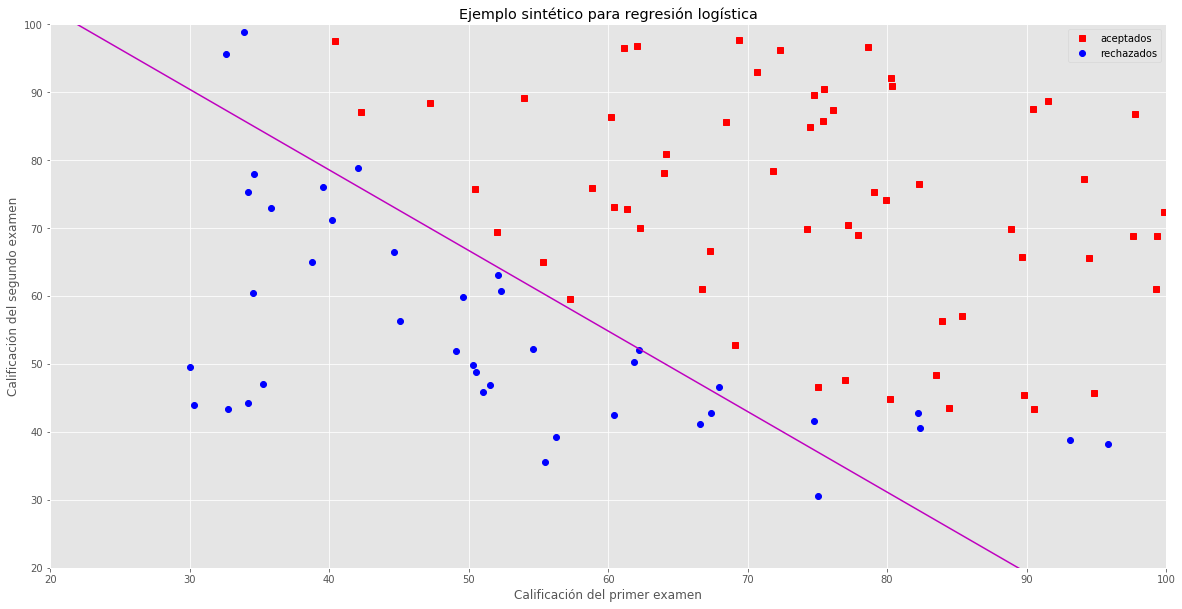

In [48]:
x1_frontera = np.array([20, 100]) #Los valores mínimo y máximo que tenemos en la gráfica de puntos
x2_frontera = -(b / w[1]) - (w[0] / w[1]) * x1_frontera

plt.plot(x[y == 1, 0], x[y == 1, 1], 'sr', label='aceptados') 
plt.plot(x[y == 0, 0], x[y == 0, 1], 'ob', label='rechazados')
plt.plot(x1_frontera, x2_frontera, 'm')
plt.title(u'Ejemplo sintético para regresión logística')
plt.xlabel(u'Calificación del primer examen')
plt.ylabel(u'Calificación del segundo examen')
plt.axis([20, 100, 20, 100])
plt.legend(loc=0)



Y para que tengas una idea de lo que debería de salir, anexo una figura obtenida con el código que yo hice:

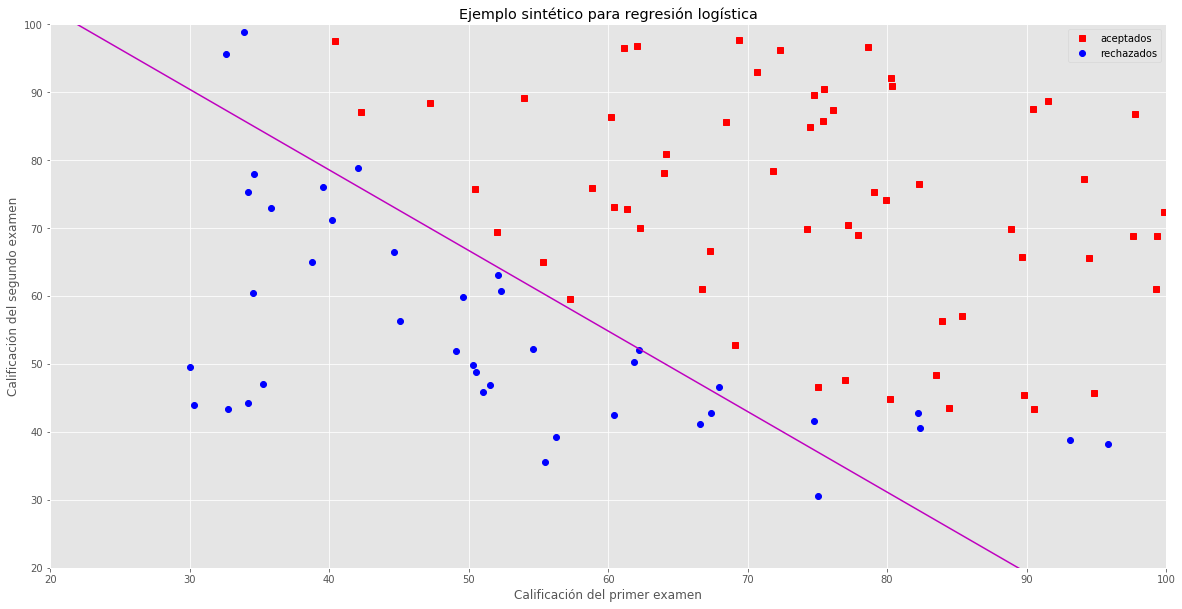

In [51]:
Image(filename='imagenes/ejemplo_logistica.png')